Download the Mona Lisa Image from https://en.wikipedia.org/wiki/File:Mona_Lisa.jpg

In [1]:
import requests


URL = "https://upload.wikimedia.org/wikipedia/commons/6/6a/Mona_Lisa.jpg"
response = requests.get(URL)
if response.status_code == 200:
    with open("downloaded_image.jpg", "wb") as file:
        file.write(response.content)
    print("Image downloaded successfully!")



Failed to retrieve image. HTTP Status code: 403


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

Plot the image

In [3]:
img  = mpimg.imread("downloaded_image.jpg")


In [4]:
img[:,:,0].shape

(4289, 2835)

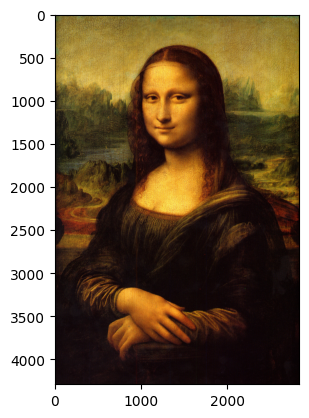

In [5]:
plt.imshow(img)


Here the object img is a numpy array. Now we will shift the X axis by t pixels for t ranging between -10 to 10 pixels.

In [6]:
img.shape

(4289, 2835, 3)

In [7]:
x_pixels = img.shape[1]
y_pixels = img.shape[0]
channels = img.shape[2]

Make 21 copies of the image

In [8]:
new_img = np.zeros((y_pixels,x_pixels,channels,21))
for i in range(21):
    # print(new_img[i].shape,img.shape)
    new_img[:,:,:,i] = img.copy()

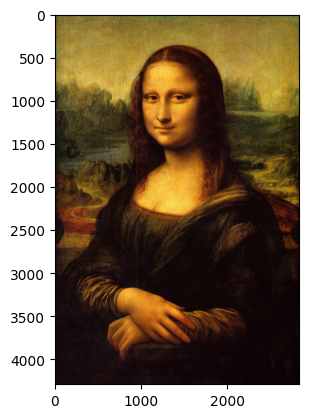

In [9]:
plt.imshow(new_img[:,:,:,0]/255)

In [10]:
#CHeck shape
new_img[:,:,:,2].shape

(4289, 2835, 3)

Shifting Operation

<Figure size 640x480 with 0 Axes>

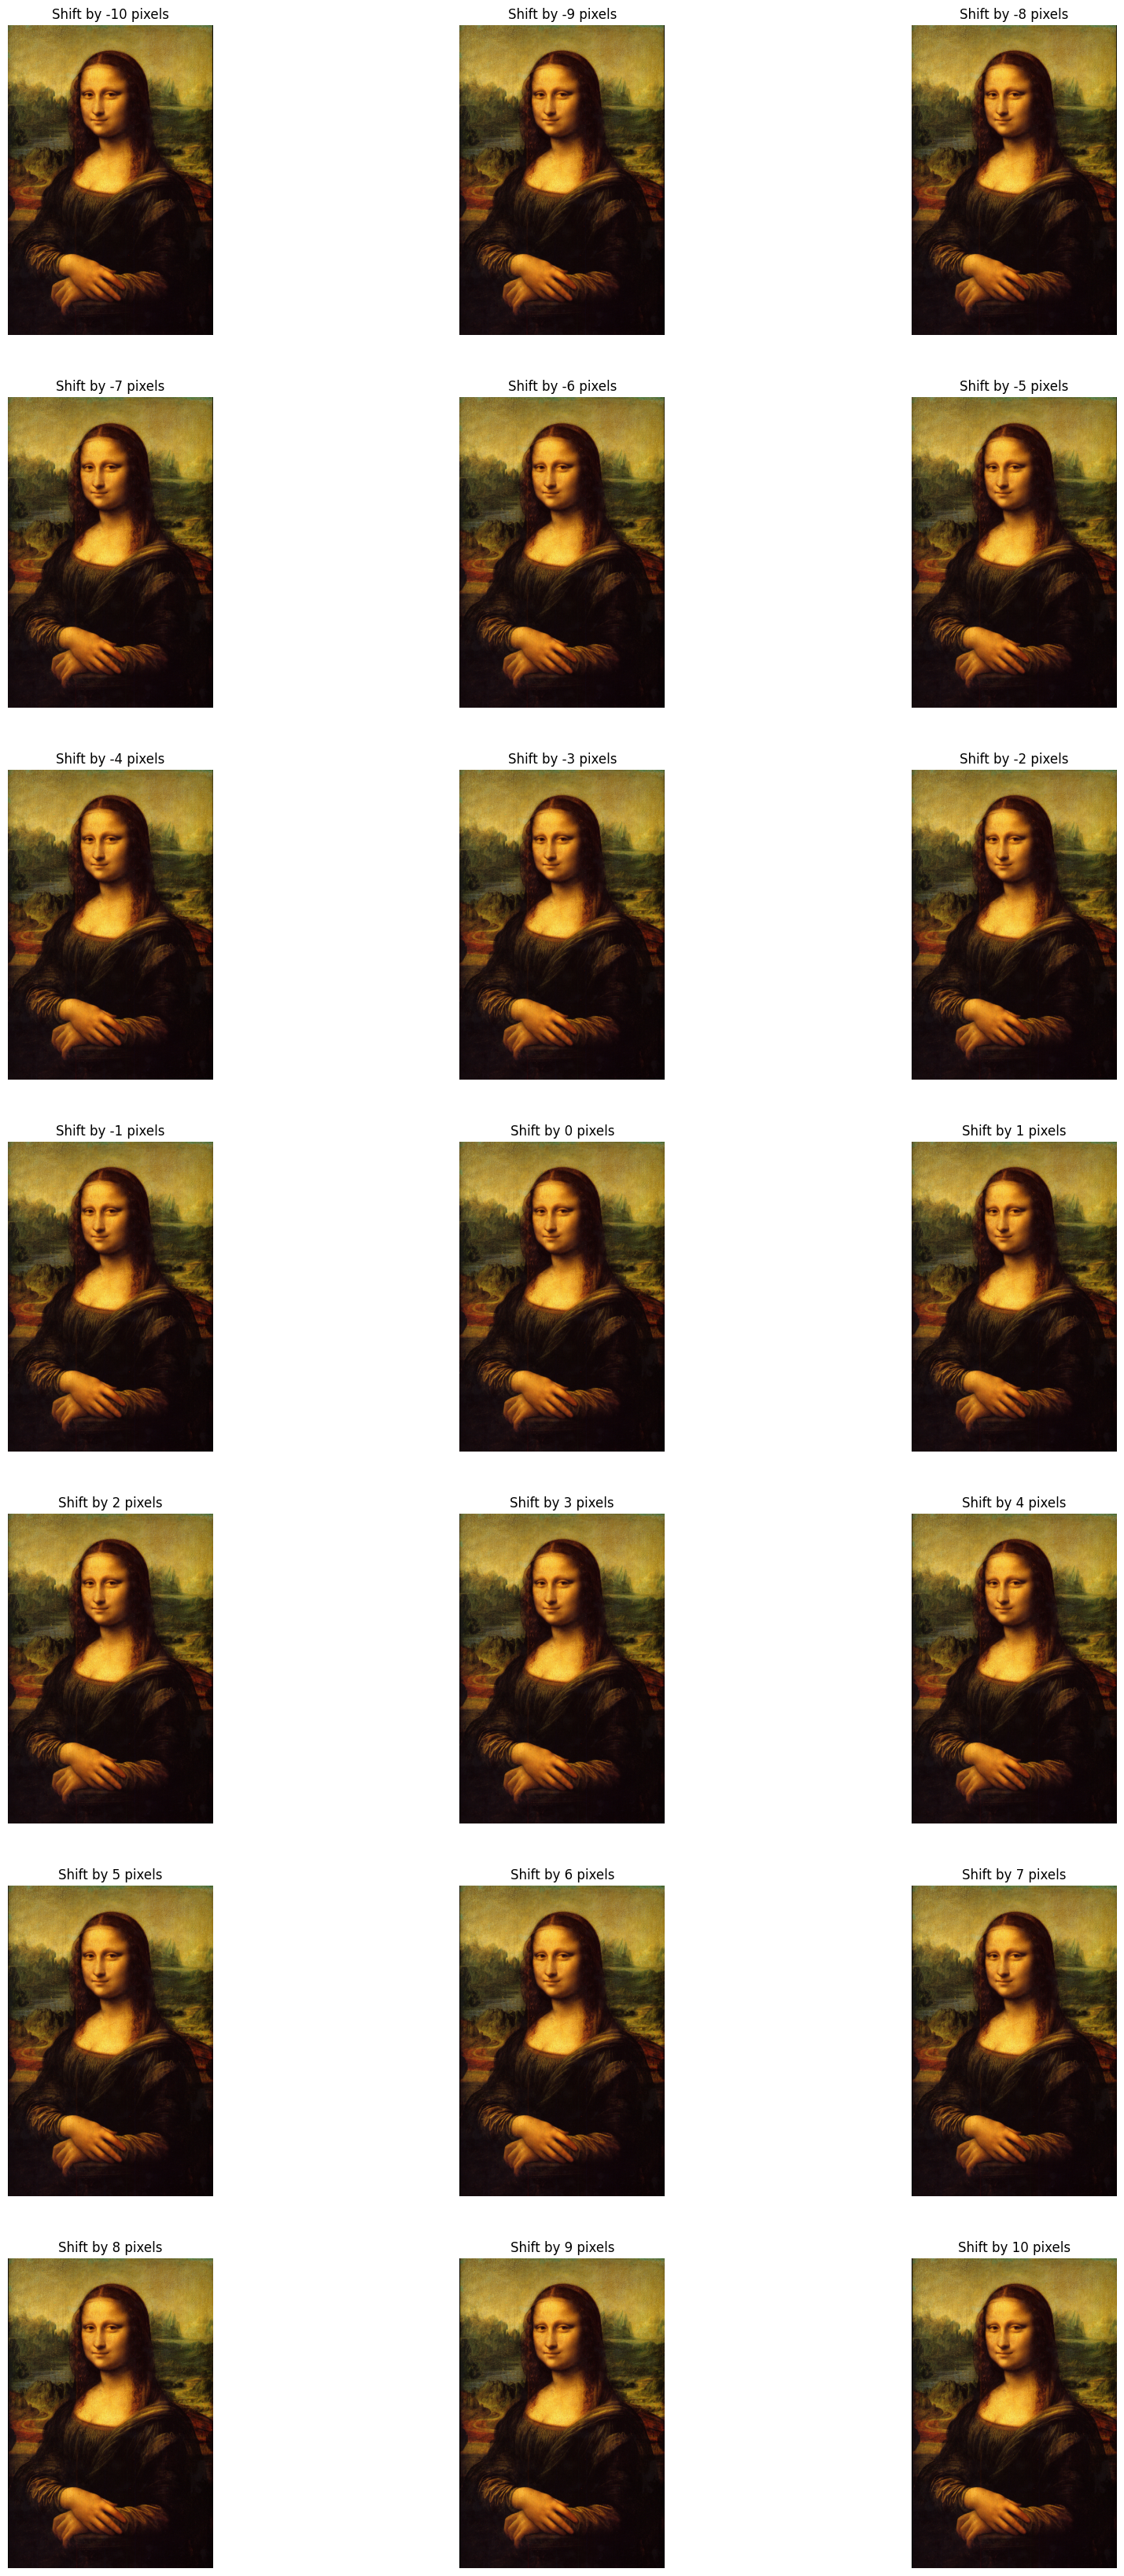

In [11]:
plt.tight_layout()
plt.figure(figsize=(21,42))
for i in range(-10,11):
	for j in range(x_pixels):
		# img[j,:,:] = (j-i>=0 and j-i<x_pixels) ? (img[j-i,:,:] ) : 0
		if (j-i>=0 and j-i<x_pixels):
			new_img[:,j,:,i+10] = img[:,j-i,:]
		else:
			new_img[:,j,:,i+10] = 0
	plt.subplot(7,3,i+11)
	plt.imshow(new_img[:,:,:,i+10]/255)
	plt.axis('off')
	plt.title(f"Shift by {i} pixels")


### Visualizing Exaggerated Shift
You may notice the black strips at the edges due to shifting.

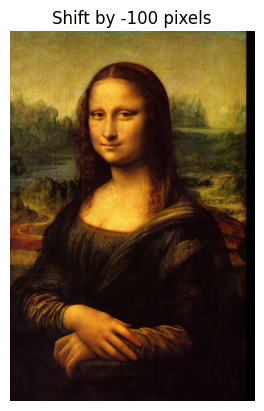

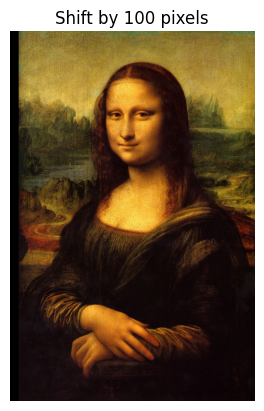

In [12]:
i = -100
img1 = np.copy(img)
for j in range(x_pixels):
	if (j-i>=0 and j-i<x_pixels):
		img1[:,j,:] = img[:,j-i,:]
	else:
		img1[:,j,:] = 0
plt.imshow(img1)
plt.axis('off')
plt.title(f"Shift by {i} pixels")
plt.show()

i = 100
img2 = np.copy(img)
for j in range(x_pixels):
	if (j-i>=0 and j-i<x_pixels):
		img2[:,j,:] = img[:,j-i,:]
	else:
		img2[:,j,:] = 0
plt.imshow(img2)
plt.axis('off')
plt.title(f"Shift by {i} pixels")
plt.show()

## Calculating Corelation

In [37]:
img_flattened = img.flatten()
img_flattened.shape

(36477945,)

In [38]:
corecoffs= []

In [39]:
new_img_flattened = new_img[:,:,:,4].flatten()
np.corrcoef(img_flattened,new_img_flattened)[0,1]

0.9666046186175747

In [40]:
(new_img_flattened == img_flattened).all()

False

In [41]:
for i in range(21):
	new_img_flattened = new_img[:,:,:,i].flatten()
	corecoffs.append(np.corrcoef(img_flattened,new_img_flattened)[0,1])
	print(f"Correlation coefficient for shift by {i-10} pixels: {corecoffs[i]}")

Correlation coefficient for shift by -10 pixels: 0.9635293448201407
Correlation coefficient for shift by -9 pixels: 0.9653590776947867
Correlation coefficient for shift by -8 pixels: 0.964985775146019
Correlation coefficient for shift by -7 pixels: 0.9673756017234968
Correlation coefficient for shift by -6 pixels: 0.9666046186175747
Correlation coefficient for shift by -5 pixels: 0.9690576671797166
Correlation coefficient for shift by -4 pixels: 0.9693759884022624
Correlation coefficient for shift by -3 pixels: 0.9734617587181551
Correlation coefficient for shift by -2 pixels: 0.9832607062686973
Correlation coefficient for shift by -1 pixels: 0.9917715001065234
Correlation coefficient for shift by 0 pixels: 1.0
Correlation coefficient for shift by 1 pixels: 0.9918283992577815
Correlation coefficient for shift by 2 pixels: 0.9833710876638244
Correlation coefficient for shift by 3 pixels: 0.9736203982590681
Correlation coefficient for shift by 4 pixels: 0.9695866067024744
Correlation coe

In [18]:
corecoffs

[0.9635293448201407,
 0.9653590776947867,
 0.964985775146019,
 0.9673756017234968,
 0.9666046186175747,
 0.9690576671797166,
 0.9693759884022624,
 0.9734617587181551,
 0.9832607062686973,
 0.9917715001065234,
 1.0,
 0.9918283992577815,
 0.9833710876638244,
 0.9736203982590681,
 0.9695866067024744,
 0.9693199275924969,
 0.966914584675887,
 0.9677290792388898,
 0.9653747430584079,
 0.9657861527242785,
 0.9639946536990801]

In [19]:
corecoffs = np.array(corecoffs)

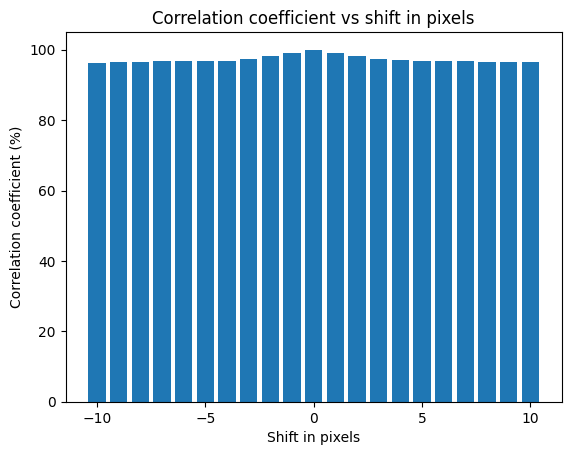

In [20]:
plt.bar(range(-10,11),corecoffs*100)
plt.xlabel("Shift in pixels")
plt.ylabel("Correlation coefficient (%)")
plt.title("Correlation coefficient vs shift in pixels")
plt.show()

# Plotting Normalized Histogram for Mona Lisa

In [21]:
img.shape

(4289, 2835, 3)

In [22]:
img_gray = img[:,:,0] * 0.2989 + img[:,:,1] * 0.5870 + img[:,:,2] * 0.1140  # result ibs 2D array (matrix) of shape (y_pixels, x_pixels)

Display Image with Default Colormap

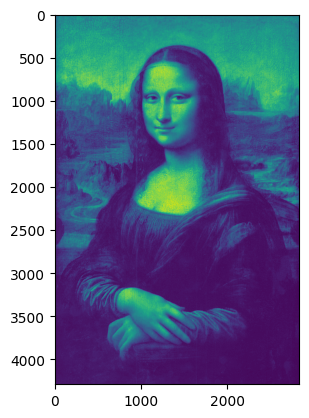

In [23]:
plt.imshow(img_gray)

Display Image with Gray Colormap

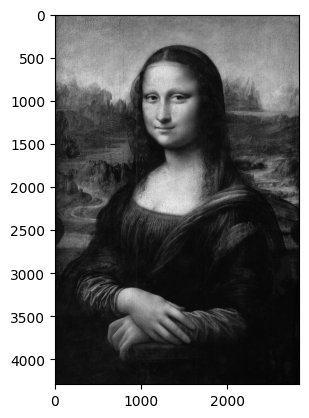

In [24]:
plt.imshow(img_gray,cmap='gray')

img_gray is of the shape y_pixels x x_pixels

In [25]:
img_gray.shape

(4289, 2835)

Make Un-normalised Histogram

In [26]:
img_gray.min()

0.0

In [27]:
img_gray.max()

236.5649

First convert all the values to int

In [28]:
img_gray = img_gray.astype(np.uint8)

In [29]:
img_gray[:10,:10]

array([[48, 58, 73, 82, 83, 87, 89, 84, 70, 65],
       [53, 57, 70, 81, 86, 92, 87, 84, 68, 65],
       [56, 52, 61, 75, 83, 96, 84, 83, 69, 67],
       [61, 50, 52, 67, 74, 89, 78, 78, 71, 70],
       [69, 53, 48, 58, 65, 78, 72, 74, 75, 75],
       [66, 53, 45, 51, 63, 69, 75, 72, 75, 75],
       [69, 58, 50, 52, 67, 66, 79, 70, 71, 73],
       [79, 70, 60, 60, 74, 66, 82, 66, 68, 70],
       [77, 84, 78, 75, 70, 70, 76, 73, 64, 68],
       [79, 86, 84, 80, 73, 77, 80, 80, 63, 65]], dtype=uint8)

The image has intensity in the range (0,255). So we will calculate the frequency of pixels for each value between 0 to 255.

In [30]:
hist = np.zeros(256)
for i in range(256):
	hist[i] = np.sum(img_gray==i)

In [31]:
hist

array([9.35000e+02, 9.79700e+03, 5.40580e+04, 9.92180e+04, 1.42109e+05,
       1.94540e+05, 2.38068e+05, 2.75831e+05, 3.07521e+05, 3.23370e+05,
       3.30715e+05, 3.30440e+05, 3.21885e+05, 3.07995e+05, 2.89410e+05,
       2.67874e+05, 2.45574e+05, 2.23621e+05, 2.01431e+05, 1.81436e+05,
       1.64339e+05, 1.48618e+05, 1.35443e+05, 1.24169e+05, 1.14799e+05,
       1.06409e+05, 9.96470e+04, 9.34910e+04, 8.84120e+04, 8.45400e+04,
       8.10040e+04, 7.79750e+04, 7.52080e+04, 7.33040e+04, 7.18480e+04,
       6.98630e+04, 6.87280e+04, 6.79110e+04, 6.64260e+04, 6.52910e+04,
       6.47840e+04, 6.46500e+04, 6.36180e+04, 6.28660e+04, 6.23970e+04,
       6.12260e+04, 6.07860e+04, 5.95210e+04, 5.93190e+04, 5.86410e+04,
       5.77420e+04, 5.68570e+04, 5.60660e+04, 5.52060e+04, 5.44070e+04,
       5.37390e+04, 5.28200e+04, 5.17270e+04, 5.09440e+04, 5.02100e+04,
       4.88900e+04, 4.82200e+04, 4.75240e+04, 4.65930e+04, 4.55390e+04,
       4.45630e+04, 4.39950e+04, 4.31760e+04, 4.19380e+04, 4.134

Unnormalized histogram

<BarContainer object of 256 artists>

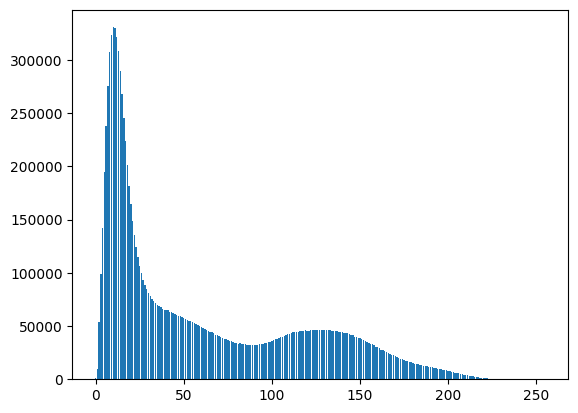

In [32]:
plt.bar(range(256),hist)

Now we normalize the histogram

In [33]:
hist.dtype

dtype('float64')

In [34]:
hist = hist/(x_pixels*y_pixels)

Now plot the normalized histogram

Text(0.5, 1.0, 'Normalized histogram of Mona Lisa bai')

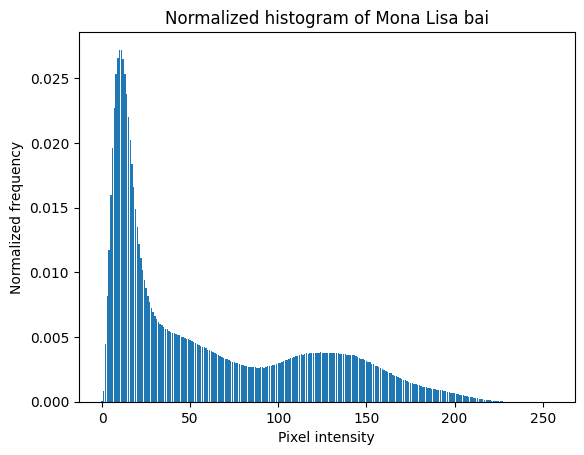

In [35]:
plt.bar(range(256),hist)
plt.xlabel("Pixel intensity")
plt.ylabel("Normalized frequency")
plt.title("Normalized histogram of Mona Lisa bai")							